# Predicting Water Pumps functionality

In [223]:
import numpy as np 
import pandas as pd
import missingno as mn #y
import seaborn as sns #y
from scipy import stats
import matplotlib.pyplot as plt
import os

import xgboost as xgb #ja
from sklearn.preprocessing import LabelEncoder #ja
from sklearn import model_selection, preprocessing # ja
from sklearn.model_selection import KFold #ja
from sklearn.metrics import mean_squared_error #ja
import pickle 



import re #y
import nltk #y
import multiprocessing #y
from sklearn.model_selection import train_test_split #y
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #y
from tqdm import tqdm # y, for progress bars  
from sklearn import utils #y


from math import sqrt
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
import skopt
from skopt.plots import plot_convergence

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from time import time, strftime, localtime
from datetime import timedelta
from sklearn.metrics import mean_squared_error


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
training_set = pd.read_csv("/notebooks/iss-katharinabaur/Project/Training_set_values.csv")

In [6]:
labels = pd.read_csv("/notebooks/iss-katharinabaur/Project/Training_set_labels.csv")

In [8]:
(labels["id"] == training_set["id"]).value_counts()

True    59400
Name: id, dtype: int64

In [7]:
training_set=training_set.drop(["extraction_type_group", "extraction_type_class", "management_group", "payment", "quality_group", "quantity_group", "source_type", "waterpoint_type_group"], axis=1)

In [8]:
labels=labels.rename(columns={"id": "id2"})


In [9]:
df = pd.concat([training_set, labels], axis=1, sort=False)

In [10]:
df["id"].equals(df["id2"])

True

In [11]:
df=df.drop(["id2"], axis=1)

In [12]:
# drop duplicates 


df.drop_duplicates(subset ="id", keep = False, inplace= True )
df= df.reset_index(drop= True)

In [13]:
df = df.drop(["scheme_name"], axis=1)

In [14]:
df.to_pickle("/notebooks/iss-katharinabaur/Project/df.pkl")

##### concatenated dataframe

In [289]:
df=pd.read_pickle("/notebooks/iss-katharinabaur/Project/df.pkl")

In [ ]:
from pandas.plotting import scatter_matrix

scatter= scatter_matrix(df, alpha=0.2, figsize= (15,15))
scatter[4,1].set_xlim(0,400)
scatter[4,2].set_xlim(0,30)
scatter[4,3].set_xlim(0,300)
scatter[4,0].set_ylim(0,100)
scatter[4,1].set_ylim(0,100)
scatter[4,2].set_ylim(0,100)
scatter[4,3].set_ylim(0,100)


plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr());

In [ ]:
df.corr()

### Mapping functioning and non-functioning wells

In [290]:
BBox = (-12,  0,      
         28, 42)

In [291]:
BBox

(-12, 0, 28, 42)

In [292]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap


In [293]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



In [294]:
lat = df["latitude"].tolist()
long = df["longitude"].tolist()

latfunc = df.loc[df["status_group"] == "functional", 'latitude'].tolist()
longfunc = df.loc[df["status_group"] == "functional", 'longitude'].tolist()


latnon = df.loc[df["status_group"] == "non functional", 'latitude'].tolist()
longnon = df.loc[df["status_group"] == "non functional", 'longitude'].tolist()


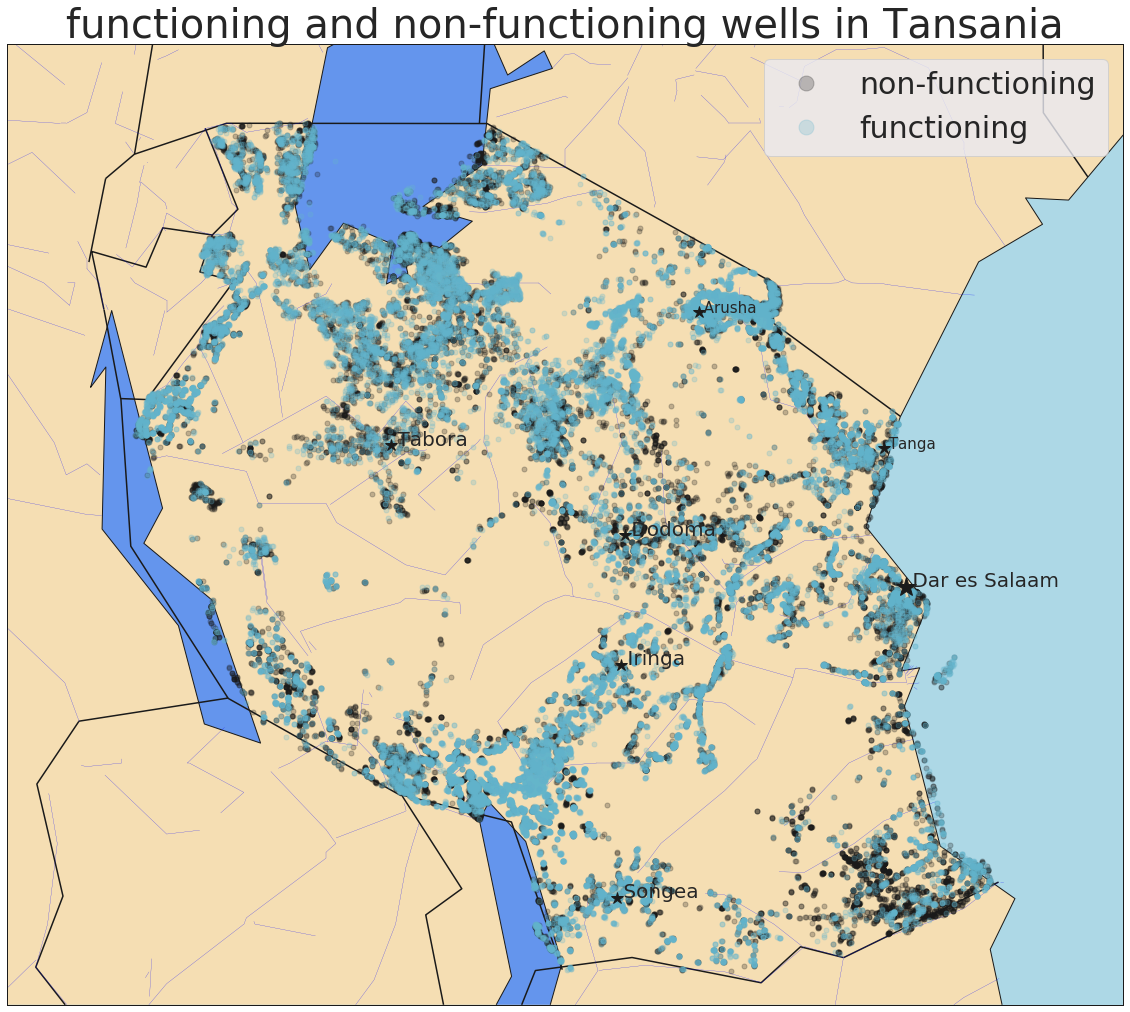

In [295]:
fig = plt.figure(figsize=(20,30))
m = Basemap(projection="mill", llcrnrlat= BBox[0], urcrnrlat=BBox[1], llcrnrlon= BBox[2], urcrnrlon= BBox[3], resolution= "c")

m.drawcoastlines()
#m.drawparallels(np.arange(-90,90,10), labels= [True, False, False, False])
#m.drawmeridians(np.arange(-180, 180, 30), labels= [0,0,0,1])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=1.5, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.2, linestyle='solid', color='blue')
m.fillcontinents(color='wheat',lake_color='cornflowerblue')
a,b = m(longnon,latnon)
m.plot(a,b, "ko", markersize= 5, alpha= 0.25 )

x,y = m(longfunc,latfunc)
m.plot(x,y, "co" ,markersize= 5, alpha=0.25 )

x, y = m(39.279556, -6.802353)
plt.plot(x, y, '*k', markersize=20)
plt.text(x, y, ' Dar es Salaam', fontsize=20);

x, y = m(39, -5.06893)
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Tanga', fontsize=15);


x, y = m(36.68333, -3.36667)
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Arusha', fontsize=15);

x, y = m(35.745426,-6.161184 )
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Dodoma', fontsize=20);

x, y = m(35.699120,-7.773094)
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Iringa', fontsize=20);

x, y = m(32.819431,-5.030461)
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Tabora', fontsize=20);


x, y = m(35.655785,-10.676803)
plt.plot(x, y, '*k', markersize=13)
plt.text(x, y, ' Songea', fontsize=20);


plt.title("functioning and non-functioning wells in Tansania", fontsize=40)
plt.legend(['non-functioning','functioning'], loc= "upper right", fontsize=30, markerscale= 3.0)




### Missing Data 

many columns have 0 values instead of NaN-values: 

In [18]:
df.isin([0]).sum()
(df == 0).astype(int).sum(axis=0)

id                       1
amount_tsh           41639
date_recorded            0
funder                   0
gps_height           20438
installer                0
longitude             1812
latitude                 0
wpt_name                 0
num_private          58643
basin                    0
subvillage               0
region                   0
region_code              0
district_code           23
lga                      0
ward                     0
population           21381
public_meeting        5055
recorded_by              0
scheme_management        0
permit               17492
construction_year    20709
extraction_type          0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [20]:
def replace(df, col):
    df[col] = df[col].replace(0, np.nan)
    
    return(df.info())

In [27]:
replace(df, ["population", "public_meeting", "construction_year", "permit", "district_code", "gps_height", "num_private"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 32 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
date_recorded        59400 non-null object
funder               55765 non-null object
gps_height           38962 non-null float64
installer            55745 non-null object
longitude            59400 non-null float64
latitude             59400 non-null float64
wpt_name             59400 non-null object
num_private          757 non-null float64
basin                59400 non-null object
subvillage           59029 non-null object
region               59400 non-null object
region_code          59400 non-null int64
district_code        59377 non-null float64
lga                  59400 non-null object
ward                 59400 non-null object
population           38019 non-null float64
public_meeting       51011 non-null object
recorded_by          59400 non-null object
scheme_management    55523 n

In [28]:
percentagemv= (df.isnull().sum()/df.index.size*100).round(2)
display(percentagemv)

id                    0.00
amount_tsh            0.00
date_recorded         0.00
funder                6.12
gps_height           34.41
installer             6.15
longitude             0.00
latitude              0.00
wpt_name              0.00
num_private          98.73
basin                 0.00
subvillage            0.62
region                0.00
region_code           0.00
district_code         0.04
lga                   0.00
ward                  0.00
population           35.99
public_meeting       14.12
recorded_by           0.00
scheme_management     6.53
permit               34.59
construction_year    34.86
extraction_type       0.00
management            0.00
payment_type          0.00
water_quality         0.00
quantity              0.00
source                0.00
source_class          0.00
waterpoint_type       0.00
status_group          0.00
dtype: float64

In [29]:
df = df.drop(["num_private"], axis=1)

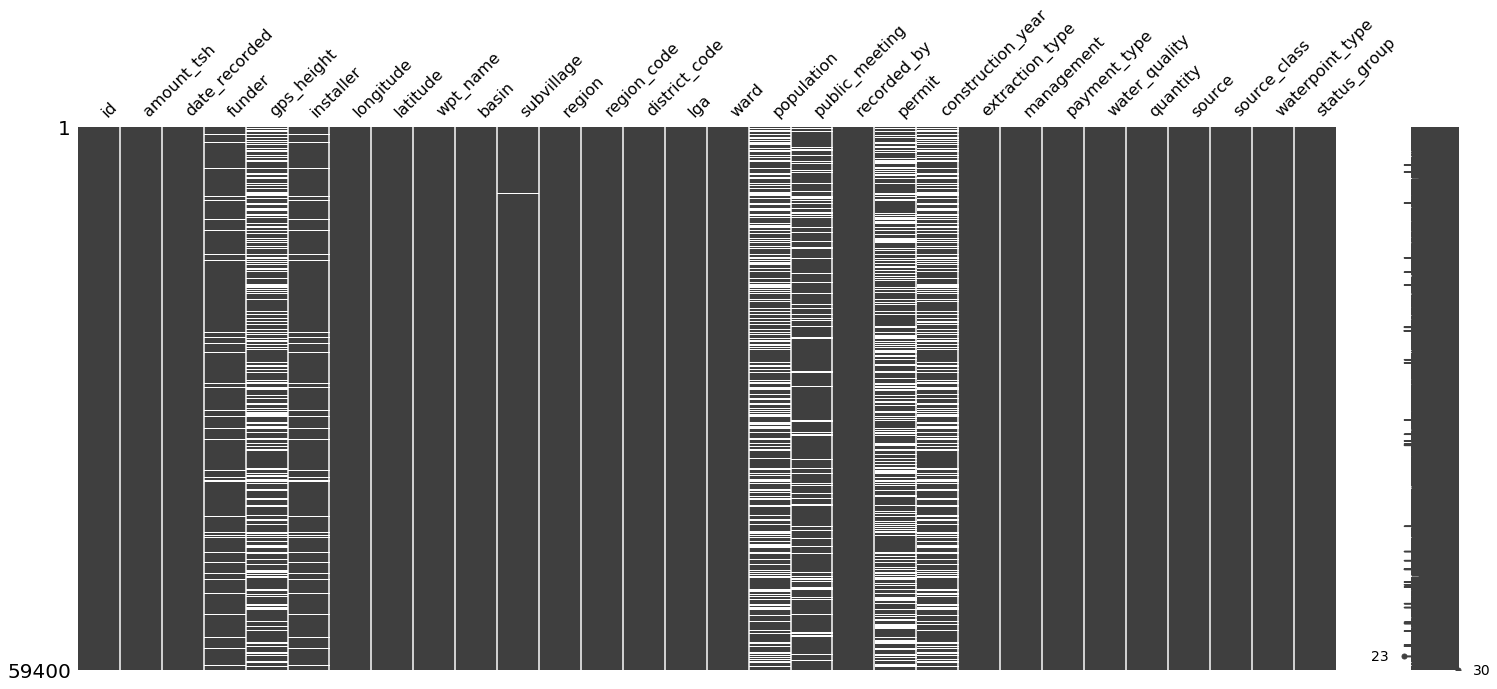

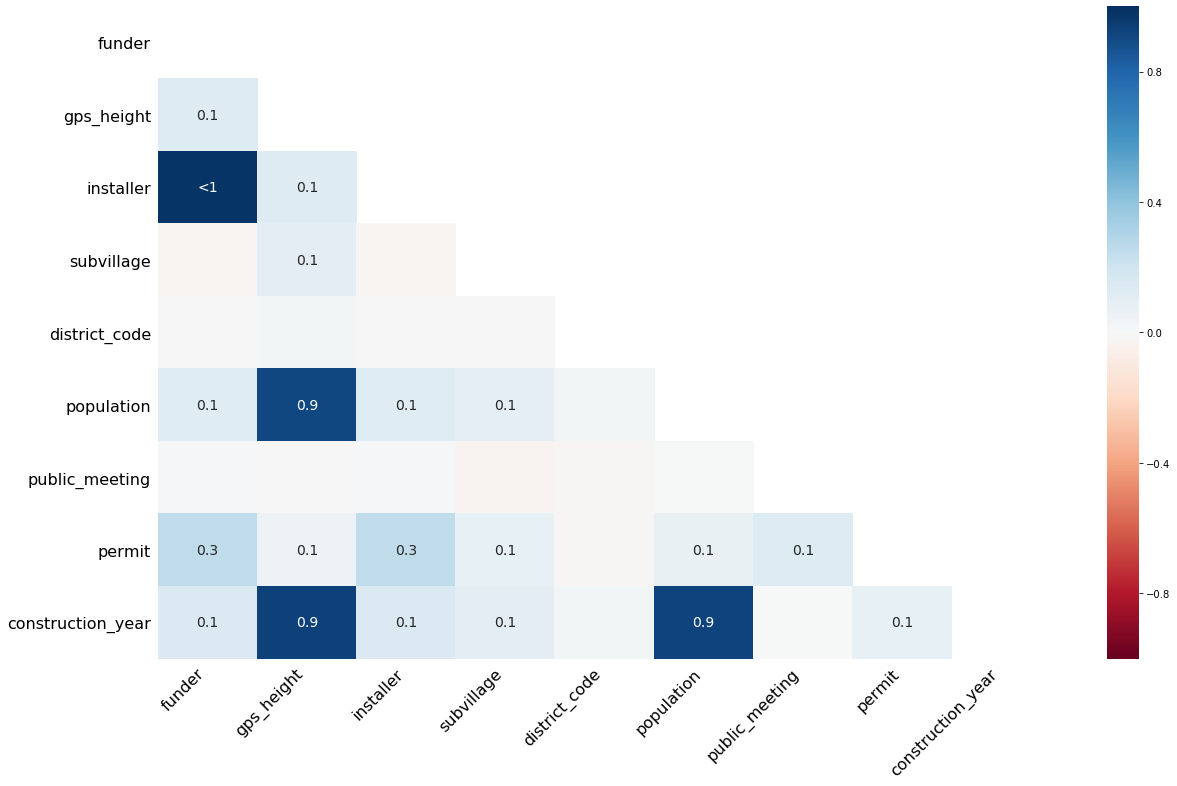

In [41]:
mn.matrix(df)
mn.heatmap(df)

In [38]:
df[["scheme_management", "management"]]

,scheme_management,management
0,VWC,vwc
1,Other,wug
2,VWC,vwc
3,VWC,vwc
4,NaN,other
...,...,...
59395,Water Board,water board
59396,VWC,vwc
59397,VWC,vwc
59398,VWC,vwc


In [39]:
df = df.drop(["scheme_management"], axis=1)
df.loc[df["funder"]== "0"]
df["funder"] = df["funder"].replace("0", np.nan
df.loc[df["installer"]== "0"]
df["funder"] = df["funder"].replace("0", np.nan)


delete all missing observations from the dataset as no imputation method makes sense due to large amount of missing values



In [73]:
df1= df.dropna(axis=0)

In [75]:
df1.to_pickle("/notebooks/iss-katharinabaur/Project/df_without_nan.pkl")

#### Outlier Removal 

In [9]:
df1= pd.read_pickle("/notebooks/iss-katharinabaur/Project/df_without_nan.pkl")

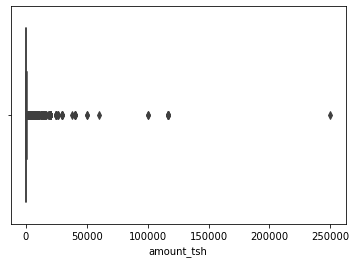

In [10]:
sns.boxplot(x= df1["amount_tsh"])

In [11]:

df1 = df1[df1.amount_tsh < 75000]

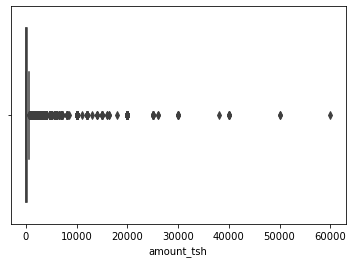

In [12]:
sns.boxplot(x= df1["amount_tsh"])

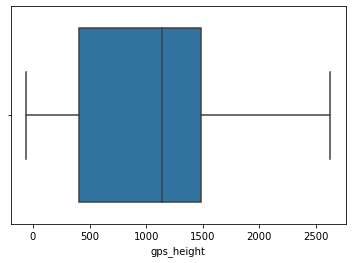

In [13]:
sns.boxplot(x= df1["gps_height"])
#no outliers

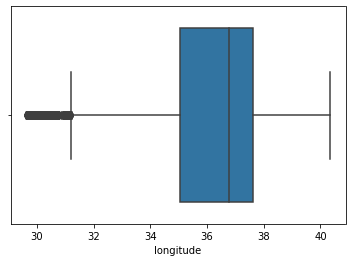

In [14]:
sns.boxplot(x= df1["longitude"])


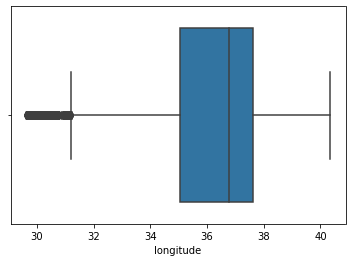

In [17]:
df1 = df1[df1.longitude > 15]
sns.boxplot(x= df1["longitude"])


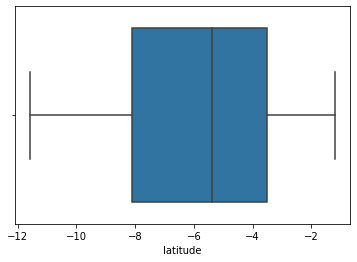

In [18]:
sns.boxplot(x= df1["latitude"])

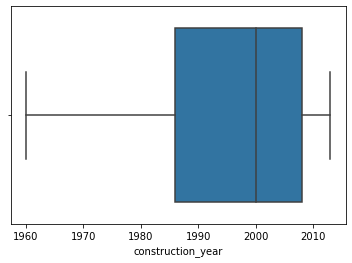

In [19]:


sns.boxplot(x= df1["construction_year"])


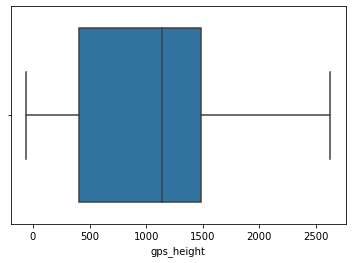

In [20]:
sns.boxplot(x= df1["gps_height"])


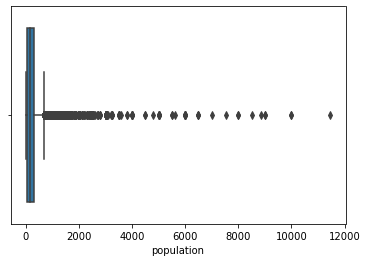

In [22]:
sns.boxplot(x= df1["population"])

In [23]:
df1 = df1[df1.population > 2]

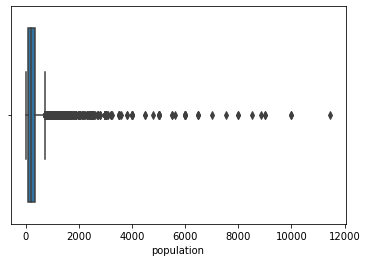

In [24]:
sns.boxplot(x= df1["population"])

In [25]:
df1=df1.reset_index(drop=True)

### Feature engineering

In [49]:
df1["Age"]= 2019 - df1["construction_year"]

In [53]:
df1 = df1.drop(["construction_year"], axis=1)

In [55]:
df1.date_recorded

0        2013-02-25
1        2013-01-28
2        2011-07-04
3        2011-09-04
4        2011-10-04
            ...    
18049    2013-08-03
18050    2011-03-09
18051    2013-05-03
18052    2011-05-07
18053    2011-03-23
Name: date_recorded, Length: 18054, dtype: object

In [56]:
import datetime

In [58]:
df1['year'] = pd.DatetimeIndex(df1['date_recorded']).year

In [61]:
df1['month'] = pd.DatetimeIndex(df1['date_recorded']).month

In [134]:
df1 = df1.drop(["recorded_by"], axis=1)

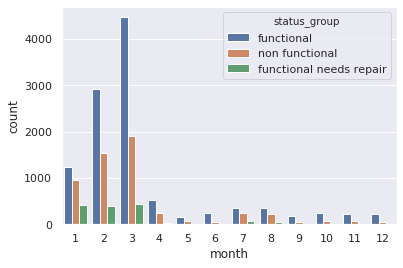

In [87]:
# Overall
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='month', hue="status_group", data=df1)
plt.show()

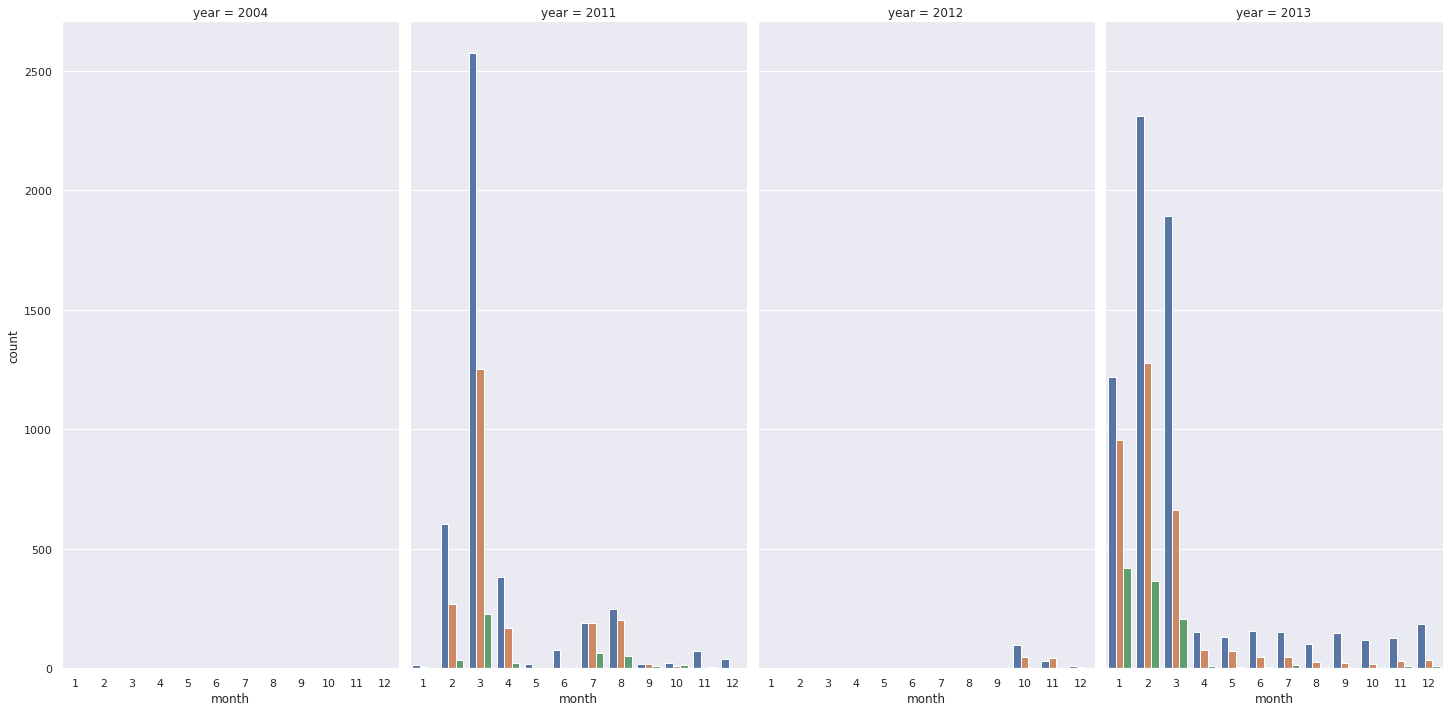

In [116]:
# per year

%matplotlib inline
g = sns.catplot(x="month", hue="status_group", col="year", data=df1, kind="count", height=10, aspect=0.5, legend=False)
plt.show()

#### Transformation of categorical features: One-hot encoding

categorical variables: funder, installer, wpt_name, basin, subvillage, region, region_code, lga, ward, public_meeting, permit,extraction_type,management,payment_type,       
water_quality,quantity, source, source_class, waterpoint_type, 



In [140]:
df1[["funder", "installer", "wpt_name", "basin", "subvillage", "region", "region_code", "lga", "ward", "public_meeting", "permit", "extraction_type", "management", "payment_type",       
"water_quality", "quantity", "source", "source_class", "waterpoint_type"]]

,funder,installer,wpt_name,basin,subvillage,region,region_code,lga,ward,public_meeting,permit,extraction_type,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,21,Simanjiro,Ngorika,True,True,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple
1,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,Nanyumbu,Nanyumbu,True,True,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
2,Unicef,DWE,Kwa John Mtenzi,Rufiji,Kidudumo,Iringa,11,Njombe,Mdandu,True,True,gravity,wua,monthly,soft,dry,river,surface,communal standpipe
3,Unicef,DWE,Kwa Rose Chaula,Rufiji,Yeriko,Iringa,11,Njombe,Usuka,True,True,gravity,wua,on failure,soft,dry,river,surface,communal standpipe
4,Unicef,DWE,Shuleni,Rufiji,Mkanivega,Iringa,11,Njombe,Usuka,True,True,gravity,wua,never pay,soft,enough,river,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18049,Government Of Tanzania,Government,Kwa,Pangani,Maore Kati,Kilimanjaro,3,Same,Maore,True,True,gravity,vwc,never pay,soft,enough,river,surface,communal standpipe
18050,World Bank,ML appro,Chimeredya,Wami / Ruvu,Komstari,Morogoro,5,Mvomero,Diongoya,True,True,submersible,vwc,monthly,soft,enough,machine dbh,groundwater,communal standpipe
18051,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,Hai,Masama Magharibi,True,True,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe
18052,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,Njombe,Ikondo,True,True,gravity,vwc,annually,soft,enough,river,surface,communal standpipe


In [147]:
df1= df1.drop(["permit", "wpt_name", "region", "lga", "ward", "public_meeting", "subvillage", "recorded_by", "installer"], axis=1)

In [187]:
df1[df1["basin"]== "Lake Tanganyika"]
df1["basin"] = [h.replace('Lake Tanganyika', 'Lake Tanganyika 2') for h in df1["basin"]]

In [193]:
df1


,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,management,payment_type,...,mono,nira/tanira,other,other - play pump,other - rope pump,other - swn 81,submersible,swn 80,walimi,windmill
0,34310,25.0,686.0,37.460664,-3.821329,21,4.0,250.0,vwc,per bucket,...,0,0,0,0,0,0,0,0,0,0
1,67743,0.0,263.0,38.486161,-11.155298,90,63.0,58.0,vwc,never pay,...,0,0,0,0,0,0,1,0,0,0
2,48451,500.0,1703.0,34.642439,-9.106185,11,4.0,35.0,wua,monthly,...,0,0,0,0,0,0,0,0,0,0
3,58155,0.0,1656.0,34.569266,-9.085515,11,4.0,50.0,wua,on failure,...,0,0,0,0,0,0,0,0,0,0
4,58500,0.0,1510.0,34.586901,-8.980014,11,4.0,350.0,wua,never pay,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18049,44885,0.0,540.0,38.044070,-4.272218,3,3.0,210.0,vwc,never pay,...,0,0,0,0,0,0,0,0,0,0
18050,11164,500.0,351.0,37.634053,-6.124830,5,6.0,89.0,vwc,monthly,...,0,0,0,0,0,0,1,0,0,0
18051,60739,10.0,1210.0,37.169807,-3.253847,3,5.0,125.0,water board,per bucket,...,0,0,0,0,0,0,0,0,0,0
18052,27263,4700.0,1212.0,35.249991,-9.070629,11,4.0,56.0,vwc,annually,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df1.management.value_counts()
df1["management"] = [h.replace('other', 'other Management') for h in df1["management"]]

In [198]:
df1["payment_type"] = [h.replace('other', 'other payment') for h in df1["payment_type"]]
df1["payment_type"] = [h.replace('unknown', 'unknown payment') for h in df1["payment_type"]]

In [204]:
df1.water_quality.value_counts()
df1["water_quality"] = [h.replace('unknown', 'unknown quality') for h in df1["water_quality"]]

In [206]:
df1.quantity.value_counts()
df1["quantity"] = [h.replace('unknown', 'unknown quantity') for h in df1["quantity"]]

In [208]:
df1.source.value_counts()
df1["source"] = [h.replace('other', 'other source') for h in df1["source"]]
df1["source"] = [h.replace('unknown', 'unknown source') for h in df1["source"]]

In [210]:
df1.source_class.value_counts()
df1["source_class"] = [h.replace('unknown', 'unknown source class') for h in df1["source_class"]]

In [214]:
df1.waterpoint_type.value_counts()
df1["waterpoint_type"] = [h.replace('other', 'unknown waterpoint') for h in df1["waterpoint_type"]]
df1["waterpoint_type"] = [h.replace('dam', 'levee') for h in df1["waterpoint_type"]]

In [226]:

column = ['funder',"pwater_quality", 'basin', "extraction_type", "management", "payment_type", "water_quality", "quantity", "source", "source_class", "waterpoint_type"]
for word in column:
    if word in df1.columns:
        dummyCols = pd.get_dummies(df1[word])
        df1 = df1.join(dummyCols)
        del df1[word], dummyCols
del word, column

ValueError: columns overlap but no suffix specified: Index(['coloured', 'fluoride', 'fluoride abandoned', 'milky', 'salty',
       'salty abandoned', 'soft', 'unknown quality'],
      dtype='object')

In [232]:
df1=df1.drop(["pwater_quality"], axis=1)

In [240]:
df1.to_pickle("/notebooks/iss-katharinabaur/Project/df1.pkl")

In [218]:
# Check for target
df1['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

## Model estimation without PCA

In [269]:
df1= pd.read_pickle("/notebooks/iss-katharinabaur/Project/df1.pkl")

###### XGBoost model 

without hpo

In [283]:
df1= df1.reindex(np.random.permutation(df1.index))
y= df1["status_group"].values
X = df1.drop(["status_group", "id"], axis=1).values
test_size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

model= XGBClassifier(max_depth=9,learning_rate=0.04164599335980548, n_estimators= 387, min_child_weight=8,
                                 min_samples_split = 572,
                                 min_samples_leaf= 96,
                                 subsample= 0.7412562832437979,
                                 max_features=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.75%


with random search

In [276]:
df1= df1.reindex(np.random.permutation(df1.index))
y= df1["status_group"].values
X = df1.drop(["status_group", "id"], axis=1).values
test_size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

model= XGBClassifier(max_depth=8,
                                 min_samples_split = 500,
                                 min_samples_leaf=50,
                                 max_features=1.0,
                                 subsample=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.39%


In [277]:
# Param Space 

max_depth= Integer(low=2, high=15, name='max_depth')
learning_rate= Real(low=0.01, high=0.4, prior= 'loguniform', name='learning_rate')
n_estimators = Integer(low=50, high= 500, name='n_estimators')
min_child_weight= Integer(low=1, high=10, name= 'min_child_weight')
subsample = Real(low=0.7, high=1.0, prior= 'uniform', name= 'subsample')
min_samples_leaf= Integer(low=5, high=100, name= 'min_samples_leaf')
min_samples_split= Integer(low=100, high=1000, name="min_samples_split")
max_features= Real(low=0.5, high=1.0, name= "max_features")

dimensions= [max_depth, learning_rate, n_estimators, min_child_weight, subsample, min_samples_leaf,
     min_samples_split, max_features]

start= [8, 0.1, 100, 1, 0.8, 50, 500, 1.0 ]
[9,
 0.04164599335980548,
 387,
 8,
 0.7412562832437979,
 96,
 572,
 0.6045358103688568]

In [278]:


@use_named_args(dimensions=dimensions)
def objective(**params):
    y= df1["status_group"].values
    X = df1.drop(["status_group", "id"], axis=1).values
    test_size= 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = - accuracy_score(y_test, y_pred)
    
    return(accuracy)

In [ ]:
from skopt import dummy_minimize
random = dummy_minimize(objective, dimensions= dimensions, n_calls=100, x0= start, random_state=42, verbose= True, callback= callable)

In [281]:
random.x

[9,
 0.04164599335980548,
 387,
 8,
 0.7412562832437979,
 96,
 572,
 0.6045358103688568]

###### K-Nearest Neighbors


In [274]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
df1= df1.reindex(np.random.permutation(df1.index))
y= df1["status_group"]
X = df1.drop(["status_group", "id"], axis=1)
X= preprocessing.StandardScaler().fit(X).transform(X)
test_size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
knn = KNeighborsClassifier(n_neighbors=15, leaf_size=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.88%


###### SVM 

In [284]:
df1= df1.reindex(np.random.permutation(df1.index))
y= df1["status_group"].values
X = df1.drop(["status_group", "id"], axis=1).values

test_size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

    

Accuracy: 74.47%


In [287]:
df1= df1.reindex(np.random.permutation(df1.index))
y= df1["status_group"].values
X = df1.drop(["status_group", "id"], axis=1).values

test_size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

svclassifier = SVC(kernel='rbf', degree=8, cache_size=400)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 68.40%


In [ ]:
# https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29

#### PCA 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

df1_std = scaler.fit_transform(df1)
pca = PCA()
pca.fit(df1_std)
print(pca.explained_variance_ratio_)